In [8]:
import matplotlib.pyplot as plt 
import numpy as np 
import matplotlib.image as mpimg

In [9]:
def Read_image(img_file):
    img=mpimg.imread(img_file)
    plt.imshow(img)
    return img 

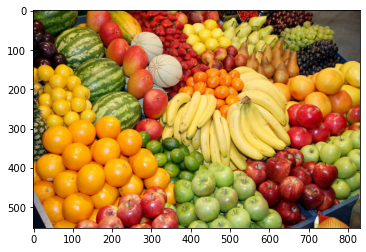

In [10]:
img=Read_image("./fruits.jpg")

In [11]:
print(img.shape )

(553, 830, 3)


In [12]:
print(np.unique(img[:,:]))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [13]:
#Assigning the values of centriod 

[[1 0 1 ... 1 0 1]
 [0 0 0 ... 1 0 0]
 [0 0 1 ... 0 1 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 1 ... 0 1 0]
 [0 1 0 ... 0 0 1]]


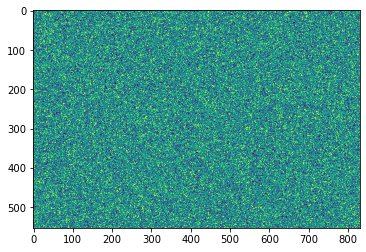

In [14]:
k=2
label_arr=np.zeros(img.shape[:2])
for i in range (img.shape[0]):    #through each rows
    for j in range(img.shape[1]):#through each columns
        label_arr[i,j]=np.random.choice(k)
label_arr=label_arr.astype("int32")

print(label_arr)
plt.imshow(label_arr)

In [8]:
def dist_p(vect1,vect2,p=2):
    l=len(vect1)
    s=0
    for i in range(l):
        diff=np.abs(vect2[i]-vect1[i])
        s+=diff**p
    dist= s**(1/p)
    return dist 

In [9]:
#defining function to generate the initial mean values from intial labels
def init_mean(k,img,label_arr):
    mean_cent=[]
    pixel_cent=[[] for k in range(k)]
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel_cent[label_arr[i,j]].append(img[i,j])
    for k in range(k):
        all_vect=np.matrix(pixel_cent[k])
        mean_k=np.mean(all_vect,axis=0)
        mean_cent.append(np.ravel(mean_k))
    return mean_cent 

In [10]:
#update labels by comparimg distance with previius mean values and generate new lable e
def label_update(prev_mean,img,label_arr,p=2):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            dist_cent=[]
            for k in range(len(prev_mean)):
                print(prev_mean[k])
                dist_cent.append(dist_p(img[i,j,:],prev_mean[k]))
            dist_cent=np.array(dist_cent)
            new_label=np.argmin(dist_cent)
            label_arr[i,j]=new_label
    return label_arr

In [11]:
#generate new mean values 
def mean_from_label(k,prev_mean,img,label_arr):
    pixel_cent=[[]for k in range(k)]
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel_cent[label_arr[i,j]].append(img[i,j])
    for k in range(k):
        if len(pixel_cent[k])!=0:
            pixel_mat=np.matrix(pixel_cent[k])
            new_mean=np.mean(pixel_mat,axis=0)
            prev_mean[k]=new_mean
    #new_mean=prev_mean
    return prev_mean
        

In [12]:
def Kmeans(img,label_arr,k,maxIter):
    mean_old=init_mean(k,img,label_arr)
    for iter in range(maxIter):
        new_label=label_update(mean_old,img,label_arr)
        mean_new=mean_from_label(k,mean_old,img,new_label)
        print("the mean obtained at{i} iteration is {mean}".format(i=it,mean=mean_new))
        label_arr=new_label
        mean_old=mean_new
    return mean_new,label_arr

In [13]:
def segment_image(img,label_arr,mean_cent):
    seg_img=np.zeros(img.shape[:2])
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            k=label_arr[i,j]
            seg_img[i,j]=mean_cent[k]
    segt_img=seg_img.astype("uint8")
    plt.imshow(seg_img)

In [ ]:
mean_centr,label_arr=Kmeans(img,label_arr,k,5)